### Hva er en Differensiallikning?
Differensiallikning er en likning som inneholder dne deriverte av en funksjon
    Ved hjelp av difflikninger kan vi å finne f(x) ved hjelp av f'(x)



### Hvordan kommer vi fram til Eulers metode?


###  1. steg $f'(x)≈ \frac {f(x+h) - f(x)} {h}$  (Newtons kvotient)  definisjon av den deriverte

### 2. steg $f'(x) * h ≈ f(x) + f'(x)*h$

### 3.steg $f(x+h)≈f(x) + f'(x)*h$

f(x+h) er det er bare en skrit fra f(x)og det vi kan gjøre nå er å finne f(x) ved hjelp av difflikning altså ved hjelp av den deriverte av definisjonen



#### Eulers metode
Euers metode hjelper oss med å finne funksjonsveridene f(t) til en ukjent funksjon ved hvert tidssteg t ut fra den deriverte av funskjonen og en steglengde h som representerer $\Delta tid$.

$f(t+1)= f(t)+f'(t)*h$

$f(t+1)$ er neste steget i funksjonen $f(t)$ hele hensiktet med Eulers metode er å finne neste steget til funksjonen.

h er et steglengde



I programmet vårt har vi først brukt en modell med en art som vi har etterhvert modifisert og byttet med modell med to arter.

#### Model med en art: 


$P'(t) = k* P(t)*(1-\frac {P(t)} {b})$

k = konstanten som fortelle hvor mye skal populasjonen øke hvert tidsteg

b = konstanten som sier hva er begrensning populasjonen kan ha

$(\frac {H(t)} {b})$ = bæreevnen 


#### Modell med to arter:


$P'(t) = aP(t)*(1-\frac {P(t)} {b})-cP(t)Z(t)$

$Z'(t) = dP(t)G(t)-eG(t)$

a = konstant som viser befolkningsvektst for P(t). Det kan være reproduksjonsraten eller i vårt tilfellde innvandring - døds raten 

b = konstant som sier hvor stor populasjon kan være 

c = konstant som sier hvor ofte art P(t) møter og blir drept av arten Z(t)

d = hyppigheten mellom to artene

e = konstant som justerer nedgangsraten

Alle modellene ble modifisert i programmet vårt. Vi har kommentert og vist underveis hvordan alle modellene ble forandret.

In [1]:
from pylab import *


innvandring = 0.1 # Befolkningen stiger med 10% på grunn av invandring og fødsel
t0 = 0 # Start år
start = 500 # Startsbefolkningen 

#Tidssteg
N = 100000
tid = 20 #Tid i år
dt = tid/(N-1)

#Matriser
t = zeros(N)
P = zeros(N)
Pder = zeros(N)

#Initierer matrisene
t[0] = t0
P[0] = start

#Eulers metode
for i in range (N-1):
    Pder[i] = innvandring * P[i] #Den deriverte av populasjonen på hvert steg
    P[i+1] = P[i] + Pder[i] * dt #Befolkningsantall på hvert steg
    t[i+1] = t[i] + dt #En verdi av tiden på hvert steg
    
#Plotting av graf
plot(t,P)       
grid()
title("Befolkning")
xlabel("År")
ylabel("Populasjon")
show()


<Figure size 640x480 with 1 Axes>

1.03 = konstant pa hvor mange som blif født 

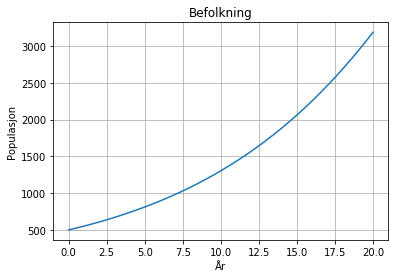

In [4]:
from pylab import *

innvandring = 0.1

t0 = 0
start = 500

N = 100000
tid = 20
dt = tid/(N-1)

t = zeros(N)
P = zeros(N)
Pder = zeros(N)

t[0] = t0
P[0] = start

for i in range (N-1):
    Pder[i] = innvandring * P[i] * (1-P[i]/20000) #Her har vi satt bærevnen på 20000 mennesker 
    P[i+1] = P[i] + Pder[i] * dt
    t[i+1] = t[i] + dt 

plot(t,P)       
grid()
title("Befolkning")
xlabel("År")
ylabel("Populasjon")
show()

### Hvilke faktorer påvirker denne?
- Mat
- plass
- vann
På grunn av at det er en zombie apokalypse så er det svært lite tilgang på mat, trygge steder og rent vann. Derfor er bærevnen i Alexandria på 20000 mennesker 

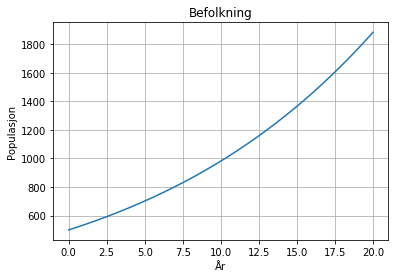

In [5]:
from pylab import *

innvandring = 0.1
død = 0.03 # 3% Av befolkningen dør hvert år 
t0 = 0
start = 500
vekst = innvandring - død #Her har vi lagt til død som en ny faktor til veksten på befolkningen 

N = 100000
tid = 20
dt = tid/(N-1)

t = zeros(N)
P = zeros(N)
Pder = zeros(N)


t[0] = t0
P[0] = start

for i in range (N-1):
    Pder[i] = vekst *  P[i] * (1-P[i]/20000)
    P[i+1] = P[i] + Pder[i] * dt
    t[i+1] = t[i] + dt 

plot(t,P)       
grid()
title("Befolkning")
xlabel("År")
ylabel("Populasjon")
show()

Det er 1% som dør av alderdom, og 2% som dør av skader, sykdommer og mangel på medisiner hvert år. Tilsammen dør 3% av befolkningen hvert år. 


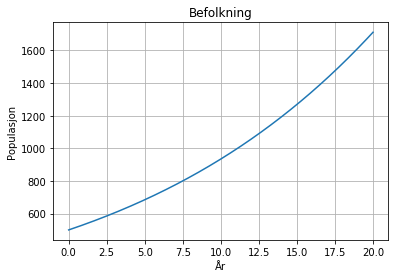

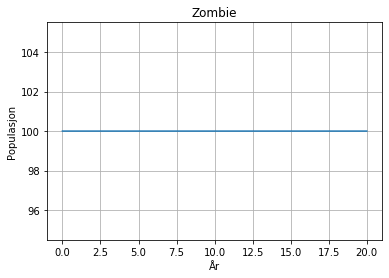

In [4]:
from pylab import *

innvandring = 0.1
death = 0.03
t0 = 0
start_mennesker = 500
start_zombie = 100 #Antall zombier på starten
vekst = innvandring - death 
hyppigheten = 0.00005 #Hyppigheten av møter mellom zombier og mennesker 
zombie_vekst_før = 0 #zombie vekst før de kan smitte mennesker (konstant)


#Siden zombier dør ikke av sult, så har vi bestemt oss å ikke ta med justeringen 

N = 100000
tid = 20
dt = tid/(N-1)

t = zeros(N)
P = zeros(N)
Z = zeros(N) #Ny matrise for populasjonen av zombie
Pder = zeros(N)
Zder = zeros(N) #Ny matrise for den deriverte av zombie populasjonen

t[0] = t0
P[0] = start_mennesker
Z[0] = start_zombie

#Eulers metode, modell med to arter
for i in range (N-1):
    Pder[i] = vekst *  P[i] * (1-P[i]/20000) - hyppigheten * P[i] * Z[i]
    Zder[i] = zombie_vekst_før
    P[i+1] = P[i] + Pder[i] * dt
    Z[i+1] = Z[i] + Zder[i]*dt
    t[i+1] = t[i] + dt 

    
#Her plotter vi Populasjon vekst
plot(t,P)       
grid()
title("Befolkning")
xlabel("År")
ylabel("Populasjon")
show()

#Her plotter vi Zombie vekst
plot(t,Z)       
grid()
title("Zombie")
xlabel("År")
ylabel("Populasjon")
show()

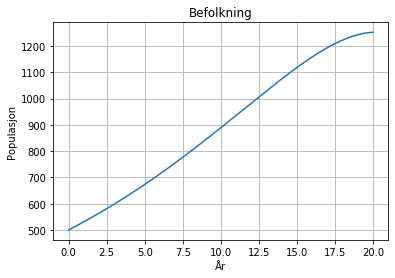

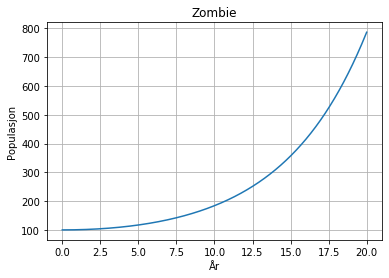

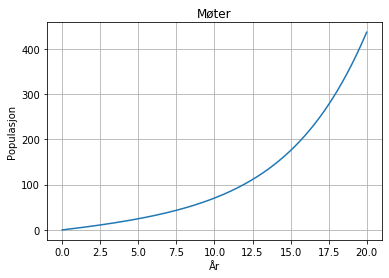

In [2]:
from pylab import *

innvandring = 0.1
death = 0.03
t0 = 0
start_mennesker = 500
start_zombie = 100
vekst = innvandring - death 
hyppigheten = 0.0004 #Vi har forandret hyppighet fra 0.00005 til 0.0004 fordi den er mer realistisk 
zombie_vekst_før = 0 #Zombie vekst før de kan smitte mennesker

N = 100000
tid = 20
dt = tid/(N-1)

t = zeros(N)
P = zeros(N)
Z = zeros(N)
Pder = zeros(N)
Zder = zeros(N)
M = zeros(N) #Møter mellom mennesker og Zombie
Pu = zeros(N) #Populasjon av menneseker uten zombie
PuDer = zeros(N) #Den deriverte av populasjonveksten uten Zombie 

t[0] = t0
P[0] = start_mennesker
Z[0] = start_zombie
M[0] = 0 #Møter mellom zombie og mennesker 
Pu[0] = start_mennesker 

for i in range (N-1):
    Pder[i] = vekst * P[i] * (1-P[i]/20000) - (hyppigheten * P[i] * Z[i])*0.2 #0.2 fordi det er 20% sjanse på at et menneske dør når den møter på en zombie
    Zder[i] = zombie_vekst_før + (M[i] * 0.3) # 0.3 fordi man har 30% sjanser på at man blir smitta når man møter på en zombie
    PuDer[i] = vekst * P[i] * (1-P[i]/20000) 
    M[i+1] =  (Pu[i] + PuDer[i] * dt) - (P[i] + Pder[i] * dt) #Møter mellom zombie er populasjonvekst uten zombie - populasjonvekst med Zombie
    Pu[i+1] = Pu[i] + PuDer[i] * dt 
    P[i+1] = P[i] + Pder[i] * dt
    Z[i+1] = Z[i] + Zder[i]*dt 
    t[i+1] = t[i] + dt 

#Plotter befolkningsvekst
plot(t,P)     
grid()
title("Befolkning")
xlabel("År")
ylabel("Populasjon")
show()

#Plotter Zombievekst
plot(t,Z)
grid()
title("Zombie")
xlabel("År")
ylabel("Populasjon")
show()

#Plotter møter mellom zombie og mennesker
plot(t,M)
grid()
title("Møter")
xlabel("År")
ylabel("Populasjon")
show()



#### Ferdig program :)

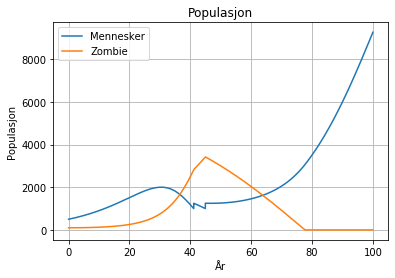

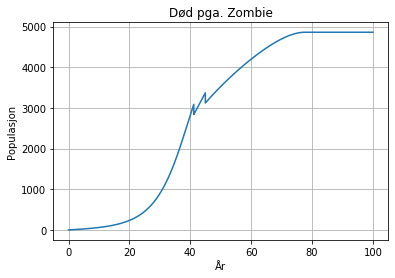

In [4]:
from pylab import *

innvandring = 0.1
death = 0.03
medisiner = 0.9 #medisiner sinker dødsraten med 10%
t0 = 0
start_mennesker = 500
start_zombie = 100
vekst = innvandring - death 
hyppigheten = 0.0004
sjanse_død = 0.2 #0.2 fordi det er 20% sjanse på at et menneske dør når den møter på en zombie
sjanse_smitta = 0.3 # 0.3 fordi man har 30% sjanser på at man blir smitta når man møter på en zombie
sjanse_drap = 0.1  #sjanse for å drepe zombie 
antall_forsterkninger = 250
befolknings_grense = 1000 #Hvis befolkningen dropper under 1000 sa kommer forstarkninger
antall = 0
trening = 0.1

N = 100000
tid = 100
dt = tid/(N-1)

t = zeros(N)
P = zeros(N)
Z = zeros(N)
Pder = zeros(N)
Zder = zeros(N)
D = zeros(N) #Møter mellom mennesker og Zombie
Pu = zeros(N) #Populasjon av menneseker uten zombie
PuDer = zeros(N) 


def forsterkninger():
    global sjanse_død
    global sjanse_drap
    global death
    sjanse_død = sjanse_død * 0.5
    sjanse_drap = sjanse_drap * 1.5
    death = death * medisiner
    vekst = innvandring - death 
    
t[0] = t0
P[0] = start_mennesker
Z[0] = start_zombie
D[0] = 0 
Pu[0] = start_mennesker 
for i in range (N-1):
    Pder[i] = vekst * P[i] * (1-P[i]/20000) - (hyppigheten * P[i] * Z[i])*sjanse_død 
    Zder[i] = (D[i] * sjanse_smitta) - (D[i] * (sjanse_drap + trening))
    PuDer[i] = vekst * P[i] * (1-P[i]/20000)
    D[i+1] =  (Pu[i] + PuDer[i] * dt) - (P[i] + Pder[i] * dt)
    Pu[i+1] = Pu[i] + PuDer[i] * dt 
    P[i+1] = P[i] + Pder[i] * dt
    
    if P[i+1] < P[i] and P[i] <= 1000 and antall < 2 : #Forsterkninger kan komme max to ganger 
        P[i+1] = P[i] + antall_forsterkninger
        forsterkninger()
        antall += 1
        
    Z[i+1] = Z[i] + Zder[i]*dt 
    t[i+1] = t[i] + dt
    
    if Z[i] <= 0:
        Z[i+1] = (Z[i] + Zder[i]*dt) * 0
    
    if death < 0.03:
        medisiner = medisiner * 1.001
    
        
#Plotter befolkningsvekst
plot(t,P, label='Mennesker')
plot(t,Z, label='Zombie')     
grid()
legend()
title("Populasjon")
xlabel("År")
ylabel("Populasjon")
show()

#Plotter hvor mange som dør pga. Zombie
plot(t,D)
grid()
title("Død pga. Zombie")
xlabel("År")
ylabel("Populasjon")
show()